# Fuzzy Logic for Mood Detection

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

### Fuzzy set definition:

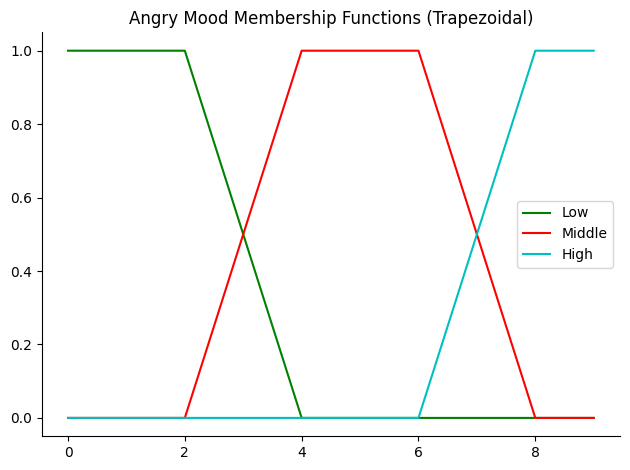

In [3]:
# Define the universe of discourse for the "Angry" mood
x_angry = np.arange(0,10,1)

# Define trapezoidal membership functions for "Angry"
angry_low = fuzz.trapmf(x_angry, [0, 0, 2, 4])
angry_middle = fuzz.trapmf(x_angry, [2, 4, 6, 8])
angry_high = fuzz.trapmf(x_angry, [6, 8, 10, 10])

# Plotting the membership functions
fig, ax = plt.subplots()

ax.plot(x_angry, angry_low, 'g', linewidth=1.5, label='Low')
ax.plot(x_angry, angry_middle, 'r', linewidth=1.5, label='Middle')
ax.plot(x_angry, angry_high, 'c', linewidth=1.5, label='High')

ax.set_title('Angry Mood Membership Functions (Trapezoidal)')
ax.legend()

# Turn off top/right axes
for ax in (ax,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

plt.show()

do the same for each mood in a loop:

In [7]:
membership_functions = []

for i in range(6):
    # Define the universe of discourse for the "Angry" mood
    x = np.arange(0,10,1)

    # Define trapezoidal membership functions for "Angry"
    low = fuzz.trapmf(x_angry, [0, 0, 2, 4])
    middle = fuzz.trapmf(x_angry, [2, 4, 6, 8])
    high = fuzz.trapmf(x_angry, [6, 8, 10, 10])

    membership_functions.append({"low": low, "middle" : middle, "high": high})


### Let's create a lexicon:

In [ ]:
# Define the lexicon with mood vectors
moods = {0: "Angry", 1: "Worried", 2: "Sad", 3: "Calm", 4: "Happy", 5: "Excited"}

lexicon = {
    "frustrated": [0.8, 0.4, 0.3, 0, 0, 0],
    "anxious": [0.3, 0.9, 0.4, 0, 0, 0.1],
    "disappointed": [0.5, 0.3, 0.8, 0.1, 0, 0],
    "peaceful": [0, 0, 0, 1, 0.4, 0.2],
    "joyful": [0, 0, 0, 0.2, 0.9, 0.7],
    "thrilled": [0, 0, 0, 0, 0.6, 1],
    "irate": [0.9, 0.2, 0.1, 0, 0, 0],
    "nervous": [0.2, 0.8, 0.3, 0.1, 0, 0.2],
    "melancholy": [0.1, 0.4, 0.9, 0.2, 0, 0], 
    "serene": [0, 0, 0, 0.9, 0.8, 0.9], 
    "elated": [0, 0, 0, 0.1, 0.8, 0.9],
    "ecstatic": [0, 0, 0, 0, 0.7, 1],
    "overjoyed": [0.1, 0.1, 0.1, 0.1, 1, 0.9],
    "gleeful": [0.1, 0.1, 0.1, 0.1, 0.9, 0.8],
    "cheerful": [0.1, 0.1, 0.1, 0.1, 0.8, 0.5],
    "optimistic": [0.1, 0.2, 0.1, 0.7, 0.8, 0.6],
    "buoyant": [0.1, 0.2, 0.1, 0.8, 0.7, 0.7],
    "enthusiastic": [0.2, 0.3, 0.1, 0.6, 0.8, 0.9],
    "upbeat": [0.1, 0.2, 0.1, 0.7, 0.8, 0.7],
    "festive": [0.1, 0.1, 0.1, 0.7, 0.8, 0.7],
    "playful": [0.1, 0.2, 0.1, 0.6, 0.7, 0.8],
    "vivacious": [0.1, 0.2, 0.1, 0.6, 0.8, 0.7],
    "jovial": [0.1, 0.2, 0.1, 0.7, 0.8, 0.7],
    "amused": [0.1, 0.2, 0.1, 0.6, 0.7, 0.7],
    "blissful": [0.1, 0.1, 0.1, 0.8, 0.9, 0.7],
    "grateful": [0.1, 0.1, 0.1, 0.8, 0.9, 0.7],
    "serene": [0.1, 0.1, 0.1, 0.9, 0.8, 0.6],
    "tranquil": [0.1, 0.1, 0.1, 0.9, 0.8, 0.6],
    "relaxed": [0.1, 0.1, 0.1, 0.9, 0.8, 0.6],
    "comfortable": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6],
    "cozy": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6],
    "warm": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6],
    "inviting": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6],
    "pleasant": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6],
    "mellow": [0.1, 0.1, 0.1, 0.8, 0.8, 0.6]
    }